<a href="https://colab.research.google.com/github/ibedoor/Coding-Dojo-Python/blob/main/video_game_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

Install Kaggle

In [8]:
!pip install -q kaggle

Import Files

In [9]:
from google.colab import files

Run to upload File

In [10]:
# choose kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bedooralharbi","key":"6e22b509f58439b84385a6babda8e35a"}'}

Make Directory

In [11]:
!mkdir -p ~/.kaggle

Save `kaggle.json` File in `kaggle` Folder

In [12]:
!cp kaggle.json ~/.kaggle/

Edit the Permissions

In [13]:
!chmod 600 ~/.kaggle/kaggle.json

Display Datasets

In [14]:
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete            World Health Statistics 2020|Complete|Geo-Analysis    1MB  2021-01-14 18:29:44           3581  
gpreda/pfizer-vaccine-tweets                                  Pfizer Vaccine Tweets                               605KB  2021-01-16 10:45:22           2209  
arashnic/covid19-case-surveillance-public-use-dataset         Covid-19 Case Surveillance Public Use Dataset        46MB  2020-12-21 02:24:21           1902  
ashkhagan/women-representation-in-city-property-sanfrancisco  Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14            500  
google/android-smartphones-high-accuracy-datasets   

Download your Dataset, get it from Copy API Command

In [15]:
!kaggle datasets download -d gregorut/videogamesales

  0% 0.00/381k [00:00<?, ?B/s]
100% 381k/381k [00:00<00:00, 54.6MB/s]


In [16]:
!ls

kaggle.json  sample_data  videogamesales.zip


Unzip Dataset

In [17]:
!unzip \*.zip && rm *.zip

Archive:  videogamesales.zip
  inflating: vgsales.csv             


Read Dataset

In [18]:
video_game = pd.read_csv('vgsales.csv')

Create DataFrame

In [19]:
sales = pd.DataFrame(video_game)

Show the Dataset

In [20]:
sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Show the Columns

In [21]:
sales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

###**Cleaning Data**

Check If There Are Any Null Values

In [22]:
sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Fill Null Values in Year Column

In [24]:
sales['Year'] = sales['Year'].fillna((sales['Year'].median()))

Verify That We Do Not Have Null Values in Year Column

In [26]:
sales['Year'].isnull().sum()

0

Remove Null Values in Publisher Column

In [46]:
sales.dropna(subset=['Publisher'], inplace=True)

Verify That We Do Not Have Null Values in Year Column

In [47]:
sales['Publisher'].isnull().sum()

0

Convert Year Column from Float to Int

In [52]:
sales['Year'].astype(float).astype(int)

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16540, dtype: int64

Display the Total Numbers for Each Genre

In [54]:

group_genre = sales.groupby(["Genre"])["Rank"].count()
group_genre

Genre
Action          3309
Adventure       1282
Fighting         846
Misc            1712
Platform         884
Puzzle           581
Racing          1248
Role-Playing    1486
Shooter         1308
Simulation       863
Sports          2343
Strategy         678
Name: Rank, dtype: int64

Display the Total Numbers for Rank Per Year

In [55]:
group_year = sales.groupby(["Year"])["Rank"].count()
group_year

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     744
2005.0     936
2006.0    1008
2007.0    1450
2008.0    1428
2009.0    1431
2010.0    1257
2011.0    1136
2012.0     655
2013.0     546
2014.0     580
2015.0     614
2016.0     342
2017.0       3
2020.0       1
Name: Rank, dtype: int64

###**Visualization**

Which Type of Platform was the Highest?

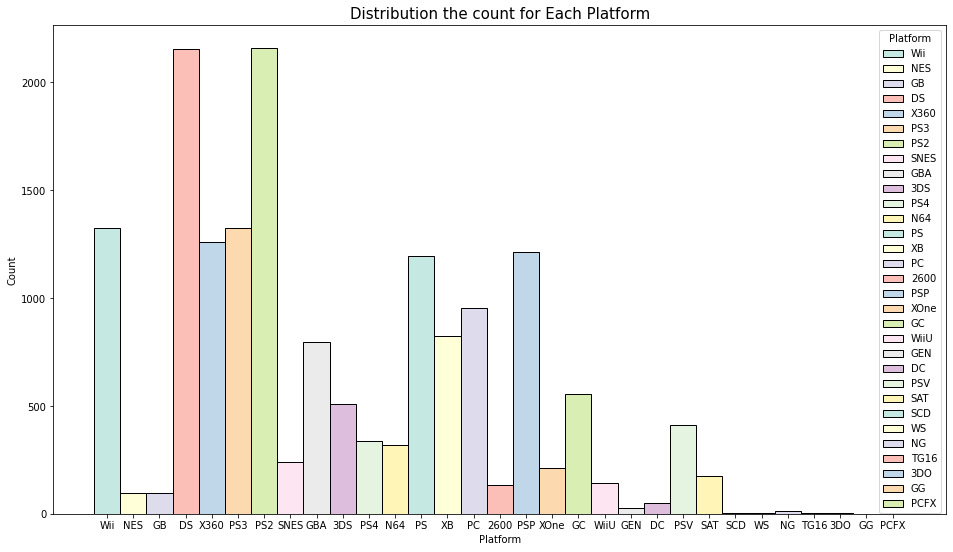

In [58]:
plt.figure(figsize=(16,9))
sns.histplot(x="Platform", hue="Platform",
              palette="Set3", data=sales).set_title('Distribution the count for Each Platform', fontsize=15);

In [59]:
sales['Global_Sales'].max()

82.74

Which Year It Had the Highest Global Sales?

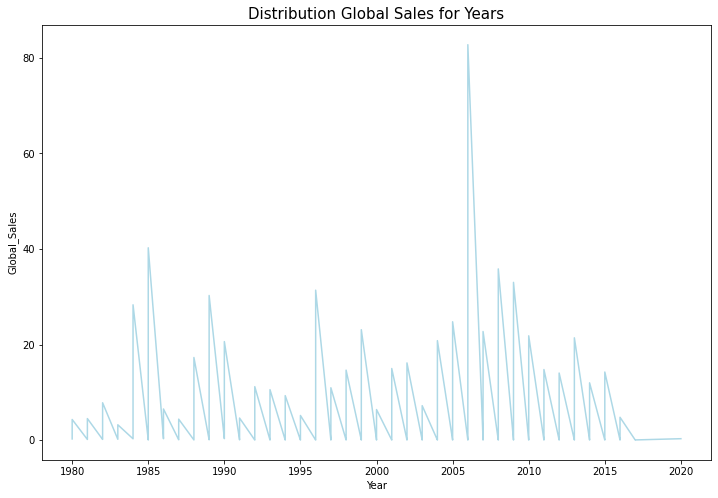

In [60]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Year', y='Global_Sales',
             color='lightblue', estimator=None,
             data = sales).set_title('Distribution Global Sales for Years', fontsize=15);

In [61]:
a = sales.groupby(['Platform'])['Rank'].count()
a

Platform
2600     133
3DO        3
3DS      507
DC        52
DS      2156
GB        98
GBA      796
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       954
PCFX       1
PS      1193
PS2     2159
PS3     1326
PS4      336
PSP     1211
PSV      411
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1324
WiiU     143
X360    1261
XB       824
XOne     213
Name: Rank, dtype: int64

Choose a Color for Pie Chart

In [62]:
cs = cm.Set3(np.arange(12)/12.)

Visualize the Percentage of Genres

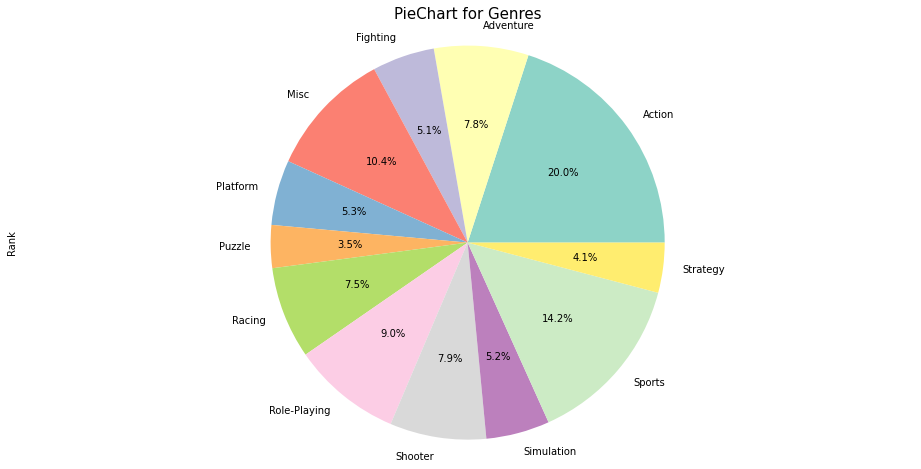

In [64]:
plt.figure(figsize=(16,8))
group_genre.plot.pie(autopct='%.1f%%', colors = cs).axis('equal')
plt.title('PieChart for Genres', fontsize=15);

Sum Sales for NA, EU, and JP

In [65]:
# sum of NA
na = sales['NA_Sales'].sum()
na

4384.41

In [66]:
# sum of EU
eu = sales['EU_Sales'].sum()
eu

2429.4500000000003

In [67]:
# sum of JP
jp = sales['JP_Sales'].sum()
jp

1290.09

In [68]:
total_sales = np.array([na, eu, jp])
ser = pd.Series(total_sales,index=['NA','EU','JP'])
ser

NA    4384.41
EU    2429.45
JP    1290.09
dtype: float64

Which Country has the Hieghest Sales?

In [69]:
cs_2 = cm.Set3(np.arange(3)/3.)

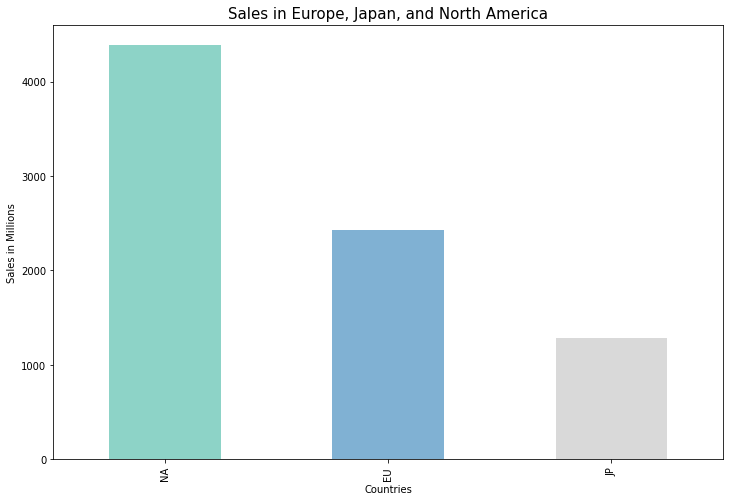

In [70]:
plt.figure(figsize=(12,8))
plt.xlabel('Countries')
plt.ylabel('Sales in Millions')
ser.plot.bar(color=cs_2).set_title('Sales in Europe, Japan, and North America', fontsize=15);